In [68]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import  linear_model, metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
# Read the data
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning.

Text(0.5, 1.0, 'Missing values Heatmap')

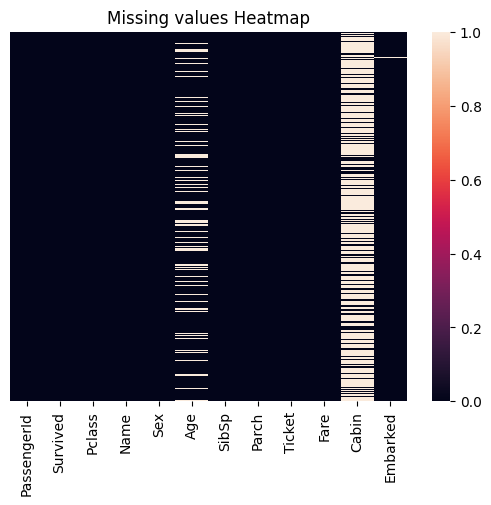

In [5]:
sns.heatmap(df.isnull(), yticklabels=False).set_title("Missing values Heatmap")

Here we can see missing value presnt in Age, Cabin, Embarked column with the help of heatmap.

In [6]:
# dropping the columns which is not required.
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [7]:
df['Age']= df['Age'].fillna(df['Age'].median())

Text(0.5, 1.0, 'Missing values Heatmap')

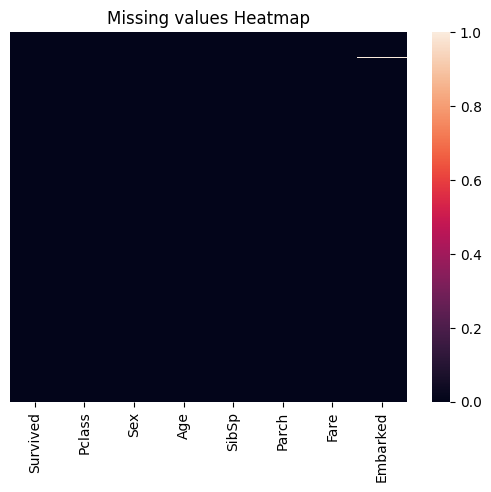

In [8]:
sns.heatmap(df.isnull(), yticklabels=False).set_title("Missing values Heatmap")

Filling the missing value with the help of mean, meadian or mode, And we can clearly see that there is no null value except Embarked column because it is in categorical.

## Exploratory Data Analysis.

Text(0.5, 1.0, 'Survival Rate Count')

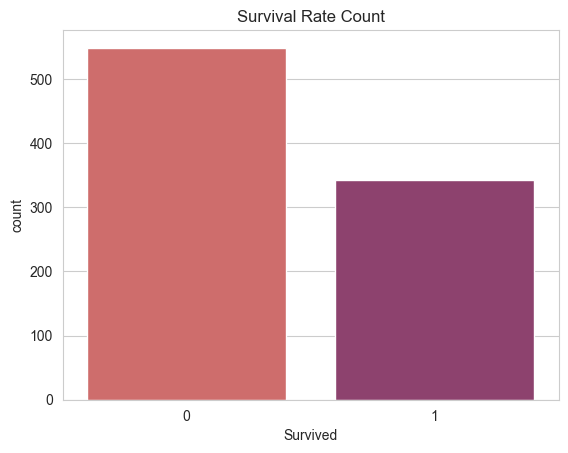

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='flare')
plt.title('Survival Rate Count')

Here with the help of count plot we can see the survival rate.

In [35]:
label = ['Male','Female']

C:\Users\Aniket Pc\AppData\Local\Temp\ipykernel_15220\83793666.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels = label, loc="best")


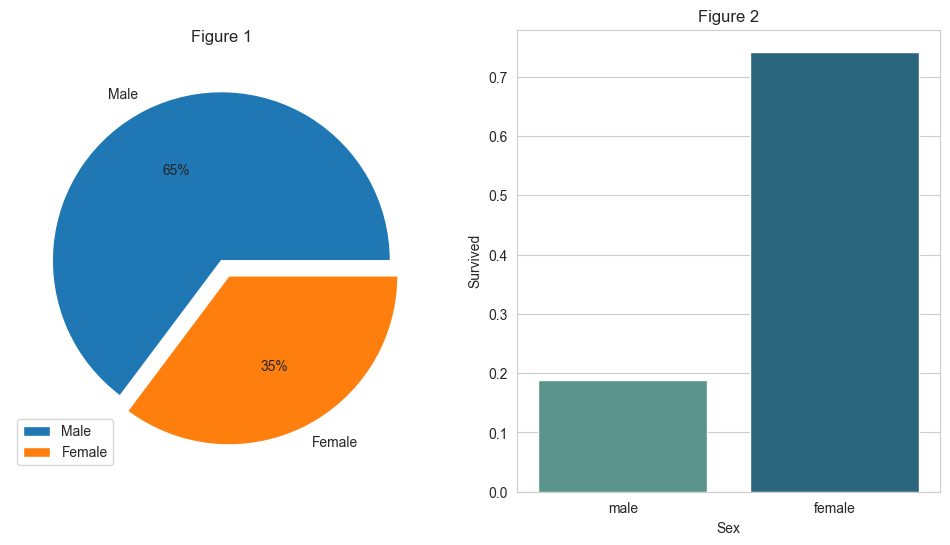

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Figure 1')
patches= plt.pie(df['Sex'].value_counts(),labels =label,explode = [0,0.1], autopct='%.0f%%')
plt.legend(patches, labels = label, loc="best")
plt.subplot(1,2,2)
plt.title('Figure 2')
sns.barplot(y = 'Survived', x = 'Sex', errorbar=None,  data = df, palette='crest')
plt.show()

"Figure 1" shows the count of gender which is there are most males than females on titanic but on the "Figure 2" we can see that females survived more as compare to males.

Text(0.5, 1.0, 'Survival Rate Vs Parents and Children')

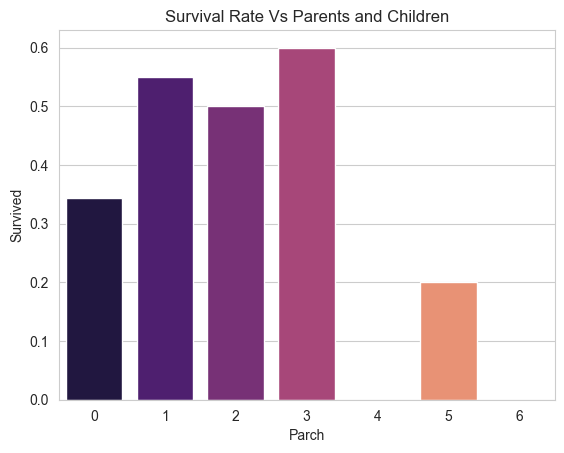

In [66]:
sns.barplot(y = 'Survived', x = 'Parch', errorbar=None,  data = df, palette='magma')
plt.title('Survival Rate Vs Parents and Children')

Parents who has Three children survived most.

Text(0.5, 1.0, 'Survival Rate VS Siblings and Spouse')

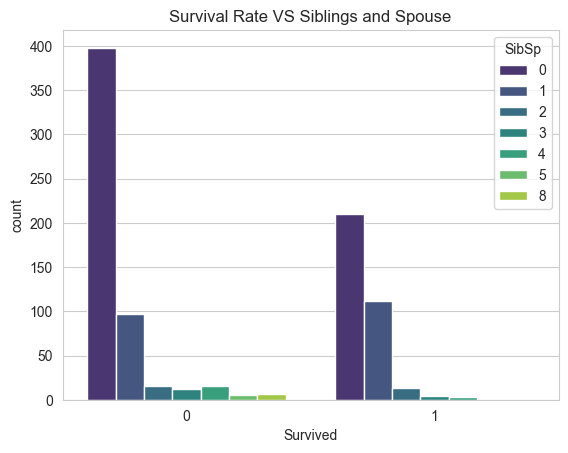

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data= df,palette='viridis')
plt.title('Survival Rate VS Siblings and Spouse')

People with zero siblings(Single) died and survived most. Also with higher sibling survial rate goes down.

Text(0.5, 1.0, 'Survival Rate Vs Passenger Class')

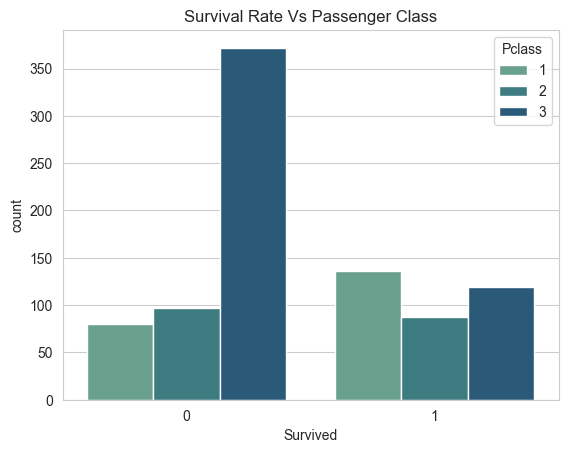

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='crest')
plt.title('Survival Rate Vs Passenger Class')

It shows that 1st Class passenger survived the most and 3rd Class passenger death count is high. Here we can conclude that surviving 1st class passenger was given more importance than other class. 

In [13]:
# Checking the skewness Value.
df.skew()

C:\Users\Aniket Pc\AppData\Local\Temp\ipykernel_15220\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

##### The variables with skewness > 1 such as SibSp, Parch and Fare are highly positively skewed.
##### The variables with -0.5 < skewness < -1 such as Pclass are moderately negatively skewed.
##### The variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as Survived and Age.

C:\Users\Aniket Pc\AppData\Local\Temp\ipykernel_15220\1717366647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap= 'cubehelix_r')


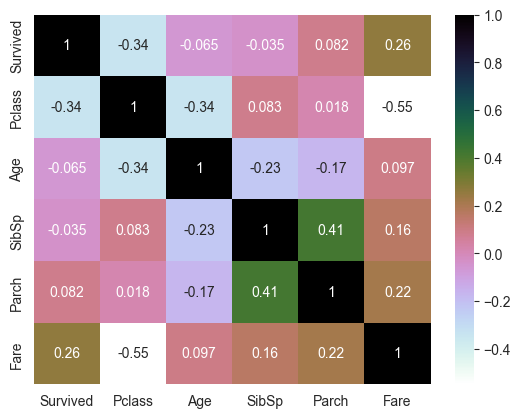

In [32]:
sns.heatmap(df.corr(), annot = True, cmap= 'cubehelix_r')
plt.show()

This heatmap shows that Fare and Age are highly correlated with each other.

## Converting Categorical to Numerical.

In [15]:
le = LabelEncoder()

In [16]:
# converting into Numeric
label_enc = df[['Sex','Embarked']].apply(le.fit_transform)

In [17]:
# Concatenating df and label_enc into final dataset.
final_df = pd.concat([df,label_enc], axis=1)

In [18]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex,Embarked
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [19]:
# Taking only Numeric Features.
final_df=final_df.select_dtypes(['number'])
final_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,28.0,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


## Splitting The Dataset Into Train And Test set

In [20]:
X = final_df.drop(['Survived'], axis = 1)
y = final_df['Survived']

print("Shape of X", X.shape)
print("Shape of y:", y.shape)

Shape of X (891, 7)
Shape of y: (891,)


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)
print("Shape of X_train", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train (596, 7)
Shape of y_train: (596,)
Shape of X_test (295, 7)
Shape of y_test: (295,)


## Feature Scaling.

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [24]:
X_train1

array([[0.        , 0.67328474, 0.        , ..., 0.10122886, 1.        ,
        0.66666667],
       [1.        , 0.34656949, 0.        , ..., 0.03025399, 1.        ,
        0.33333333],
       [0.5       , 0.30887158, 0.125     , ..., 0.08115719, 1.        ,
        0.        ],
       ...,
       [1.        , 0.50992712, 0.25      , ..., 0.02753757, 1.        ,
        0.66666667],
       [0.        , 0.17064589, 0.125     , ..., 0.2342244 , 0.        ,
        0.66666667],
       [0.        , 0.25860769, 0.        , ..., 0.15085515, 1.        ,
        0.66666667]])

As you can see data is scale down between 0 and 1. Most features did not follow normal distribution(Gaussian Curve) that's why I use Normalization instead of Standardization for Scaling the dataset. Also You Can Check the Skewness Value Above in the code.

## Applying ML Algorithm

In [71]:
# Creating a model.
def mymodel(model):
    model.fit(X_train1,y_train)
    ypred = model.predict(X_test1)
    
    train = model.score(X_train1,y_train)
    test = model.score(X_test1,y_test)
    print(f'Accuracy Score for training data is {train}')
    print(f'Accuracy Score for testing data is {test}')
    print(classification_report(y_test,ypred))
    return model

In [73]:
reg = mymodel(linear_model.LogisticRegression())

Accuracy Score for training data is 0.7953020134228188
Accuracy Score for testing data is 0.8067796610169492
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       175
           1       0.79      0.72      0.75       120

    accuracy                           0.81       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [72]:
from sklearn.ensemble import RandomForestClassifier
regressor = mymodel(RandomForestClassifier())

Accuracy Score for training data is 0.9798657718120806
Accuracy Score for testing data is 0.7762711864406779
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       175
           1       0.72      0.72      0.73       120

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295



I have use LogisticRegression and RandomForestClassifier. LogisticRegression gives good accuracy for Training and Testing data as compare to RandomForestClassifier.

## Model Deployment

In [74]:
# importing required libraries to dump a model
from re import template
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from joblib import dump, load

In [75]:
pickle.dump(reg, open('model.pkl','wb'))

I dumped my LogisticRegression trained model.